In [1]:
"""
File : RF_training.ipynb
Created by : Amen Ouannes
Brief : Build a random forest model and train it

"""

'\nFile : RF_training.ipynb\nCreated by : Amen Ouannes\nBrief : Build a random forest model and train it\n\n'

In [2]:
#importing libraries
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pickle as pk
import ML_tools as tools
import importlib
importlib.reload(tools)

<module 'ML_tools' from '/data/amen/amen_env/Ensemble learning/ML_tools.py'>

### Training

In [46]:
#import dataset for training
with open("train_datax.pkl", 'rb') as f:    
    dataset = pk.load(f)


In [3]:
#generate a dataframe to contain performances
performances = pd.DataFrame(columns = ['train', 'test', 'frequency'])

In [47]:
#encode my three classes into numerical classes
dataset, label_encoder = tools.encode(dataset)
dataset.head()

,acc_x,acc_y,acc_z,st_dev_x,st_dev_y,st_dev_z,var_x,var_y,var_z,mad_x,...,az_dynamic,static_acc_x,static_acc_y,static_acc_z,OBDA,VeDBA,roll,pitch,state,state_encoded
0,-0.842667,-0.213333,0.453333,0.056038,0.066869,0.074131,0.003140,0.004471,0.005495,0.046222,...,0.176475,-0.849723,-0.217124,0.415455,0.336767,0.467148,-0.439843,1.034382,down,0
1,-0.684444,0.240000,0.670222,0.023702,0.019596,0.039553,0.000562,0.000384,0.001564,0.017383,...,0.378537,-0.686767,0.254801,0.665487,0.405316,0.566344,0.343864,0.765740,down,0
2,-0.848000,0.091636,0.462545,0.077398,0.076429,0.087183,0.005990,0.005841,0.007601,0.058182,...,0.185687,-0.893333,0.123907,0.438285,0.186801,0.213065,0.195581,1.063316,down,0
3,-0.824000,-0.420800,0.472000,0.039373,0.045286,0.058545,0.001550,0.002051,0.003428,0.033600,...,0.053730,-0.835888,-0.386284,0.459061,0.235550,0.349363,-0.728113,0.916248,drink,1
4,-0.968000,-0.125333,0.254667,0.060061,0.096443,0.114661,0.003607,0.009301,0.013147,0.052000,...,-0.163604,-0.973069,-0.097027,0.256775,0.289824,0.469674,-0.457345,1.285571,up,2


In [48]:
#select the valuable data for the model and divide it into train and test
f_list = ['acc_x', 'acc_y', 'acc_z','st_dev_x', 'st_dev_y', 'st_dev_z', 'ax_dynamic', 'ay_dynamic', 'az_dynamic']
X_train, X_test, y_train, y_test = tools.generate_train(dataset, f_list)

In [32]:
#value counts for y
print(y_train.value_counts())
print(y_test.value_counts())

state_encoded
2    19361
1    19288
0    19150
Name: count, dtype: int64
state_encoded
0    4928
1    4797
2    4725
Name: count, dtype: int64


In [49]:
# build my randomforest model 
param_grid = tools.hypers_rf(f_list)
improved_Model = RandomForestClassifier()
improved_Grid = GridSearchCV(estimator = improved_Model, param_grid = param_grid,
                             cv = 3, verbose = 1, n_jobs = 40)

In [50]:
#training the model
start_time = time.time()
improved_Grid.fit(X_train, y_train)
end_time = time.time()
duration = end_time - start_time
print("Grid search took {:.2f} seconds".format(duration))


Fitting 3 folds for each of 2112 candidates, totalling 6336 fits
Grid search took 2017.65 seconds


### Results

In [51]:
tools.performance(improved_Grid, X_train, X_test, y_train, y_test)
print(f'the best combination is:{improved_Grid.best_params_}')

training performance = 69.262%
test performance = 66.408%
the best combination is:{'bootstrap': True, 'criterion': 'gini', 'max_depth': 9, 'max_features': 0.5, 'min_samples_split': 6, 'n_estimators': 110}


In [52]:
best_model = improved_Grid.best_estimator_
importances = best_model.feature_importances_
print((importances))

[0.0403343  0.06562391 0.06728452 0.26847048 0.09164282 0.22545523
 0.05643688 0.07843256 0.10631931]


<Figure size 1000x800 with 0 Axes>

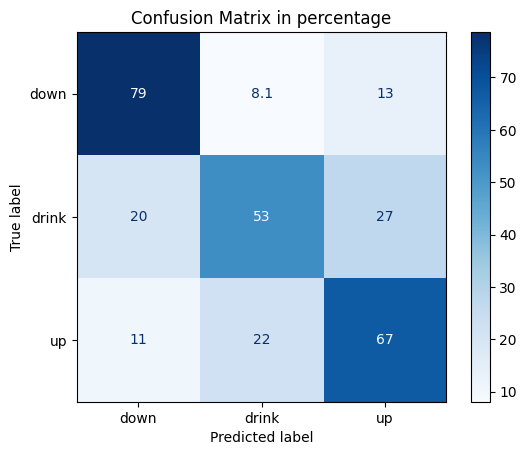

In [53]:
tools.confusion(label_encoder, improved_Grid, X_test, y_test)

In [3]:
with open('performances_1.pkl', 'rb') as f:
    perf = pk.load(f)
    dist = pk.load(f)
x = ['acc_x', 'acc_y', 'acc_z', 'stdev_x', 'stdev_y', 'stdev_z', 'Amag',
       'dyn_x', 'dyn_y', 'dyn_z', 'stat_x',
       'stat_y', 'stat_z', 'OBDA', 'VeDBA', 'roll', 'pitch']

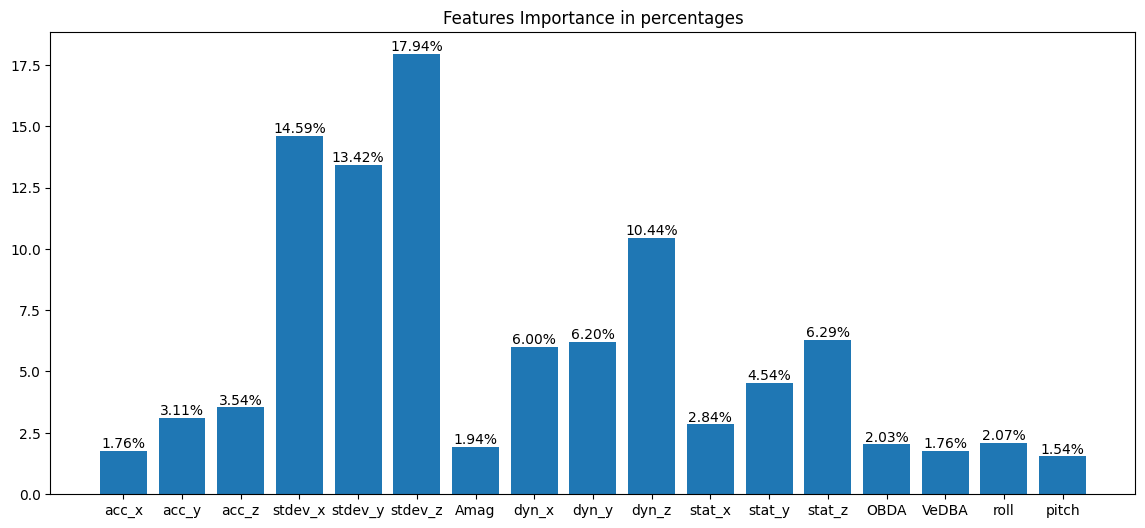

In [6]:
#plot a graph with the features importances in percentages
plt.figure(figsize=(14,6))
plt.title("Features Importance in percentages")

bars = plt.bar(x=x, height=dist*100)

# Add percentages above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()

In [15]:
with open('performances_final.pkl', 'wb') as f:
    pk.dump(performances, f)
    pk.dump(importances, f)

In [54]:
with open('best_RF.pkl', 'wb') as f:
    pk.dump(best_model, f)
    pk.dump(label_encoder, f)